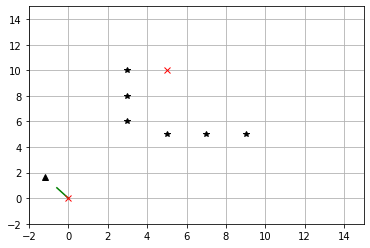

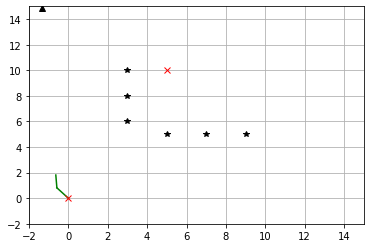

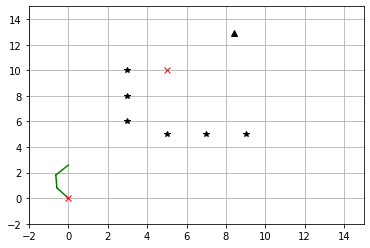

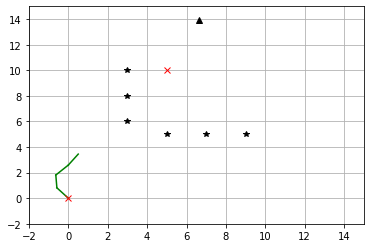

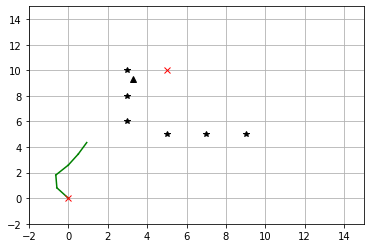

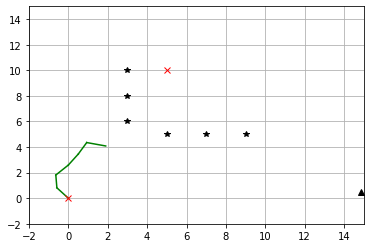

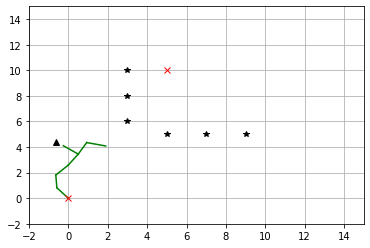

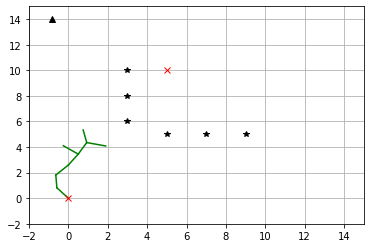

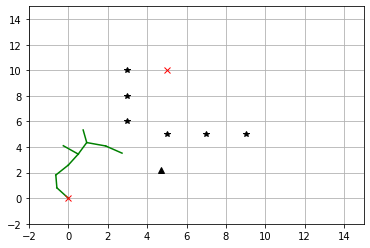

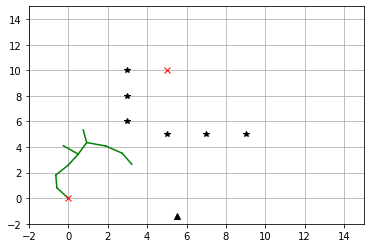

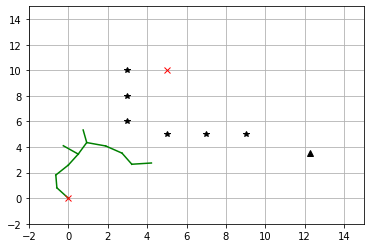

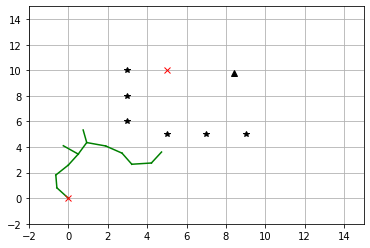

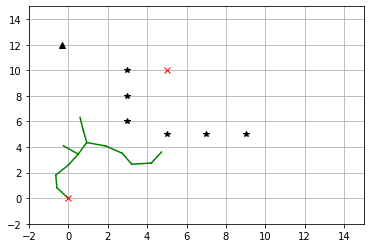

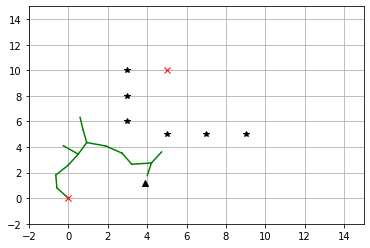

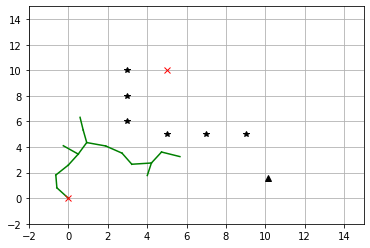

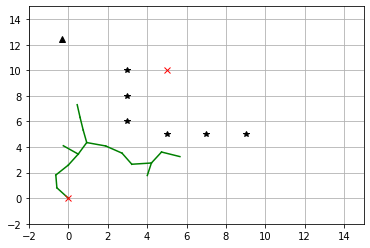

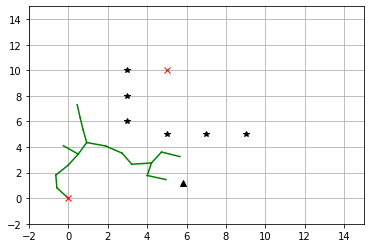

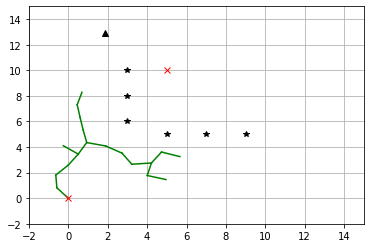

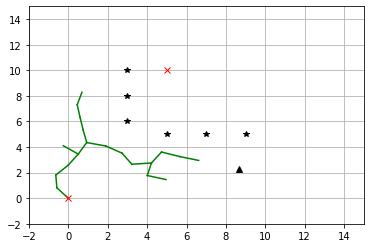

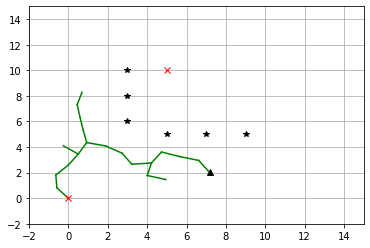

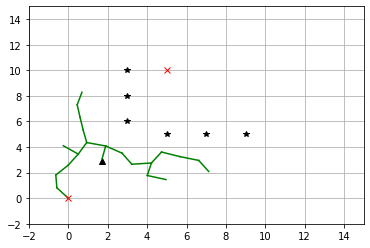

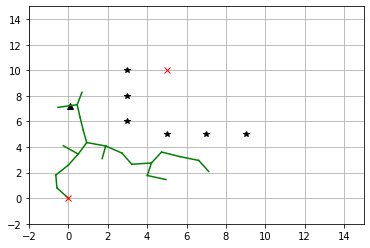

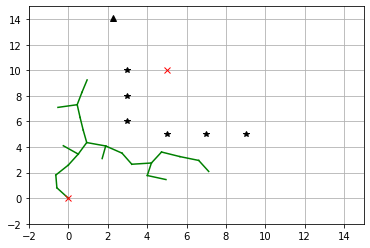

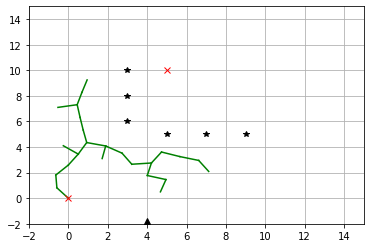

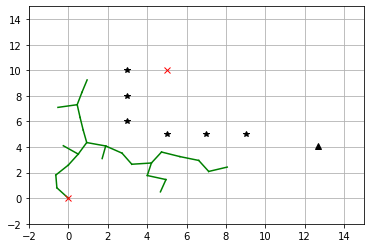

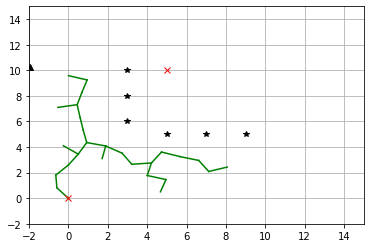

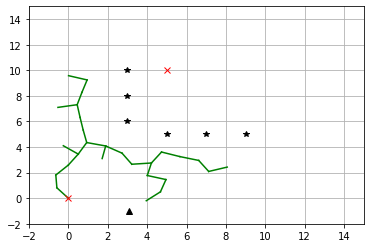

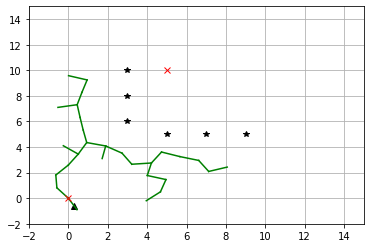

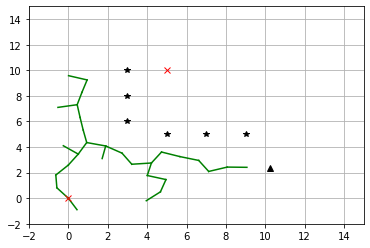

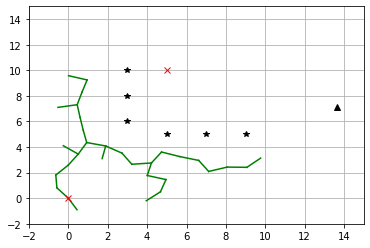

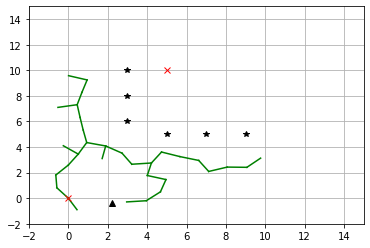

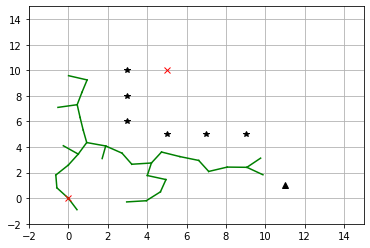

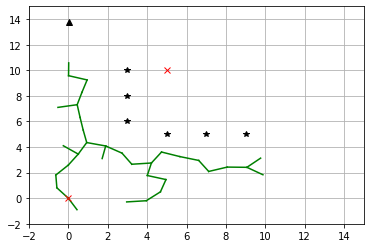

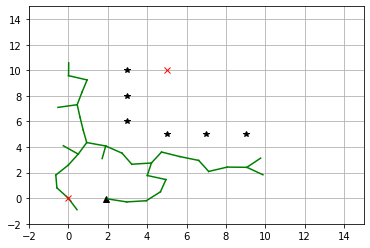

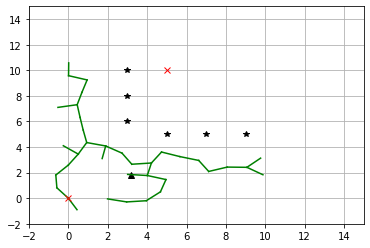

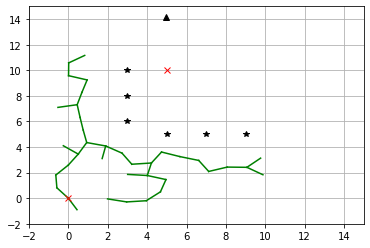

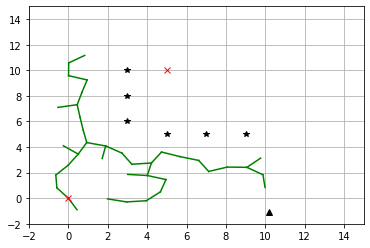

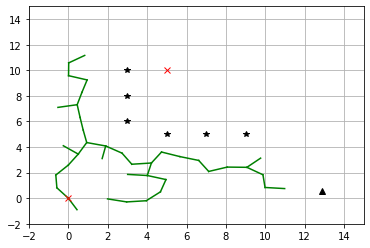

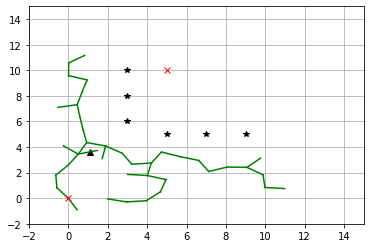

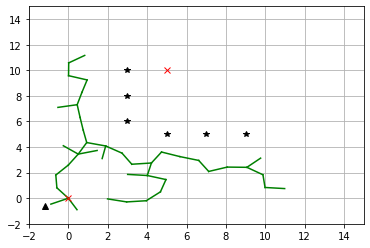

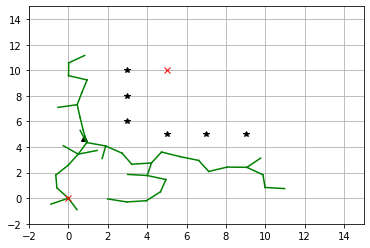

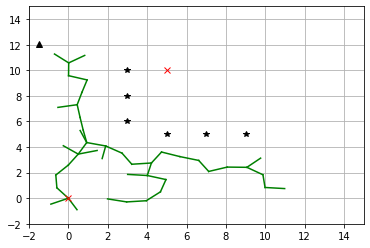

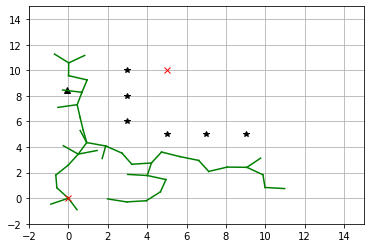

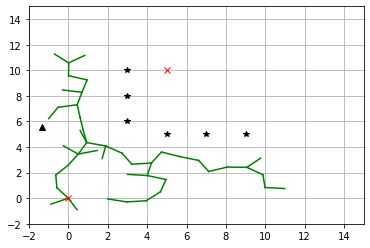

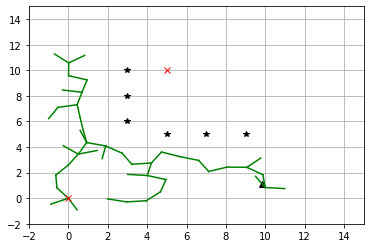

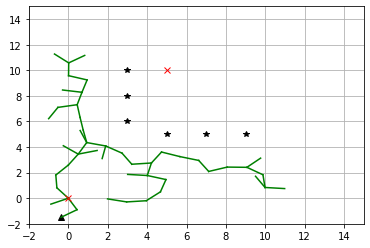

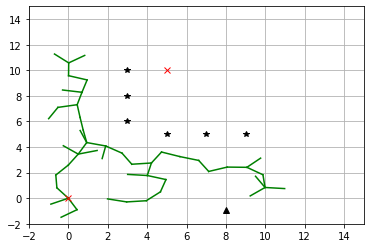

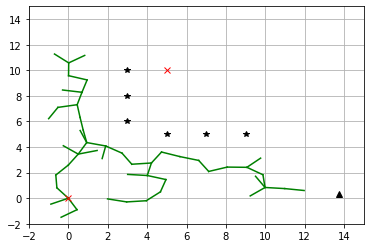

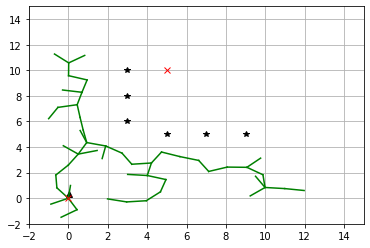

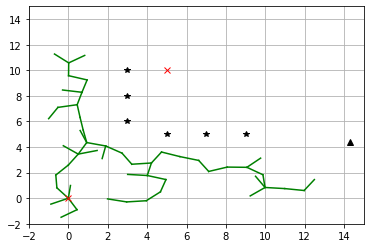

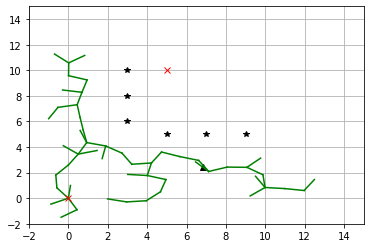

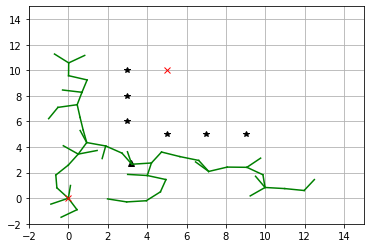

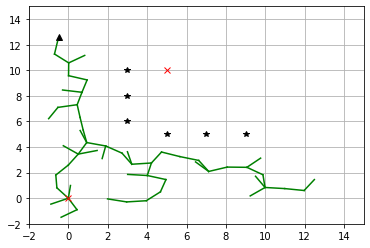

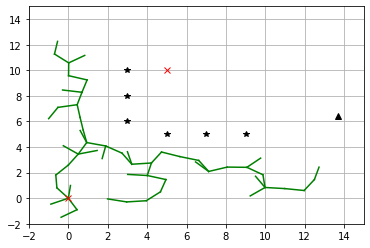

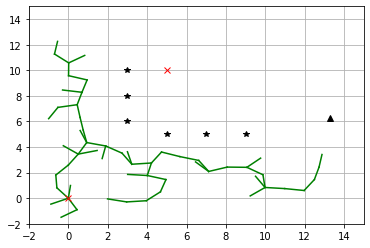

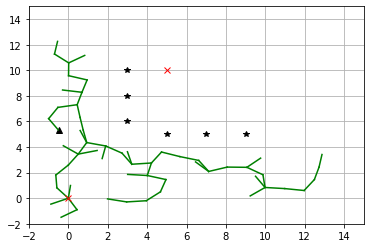

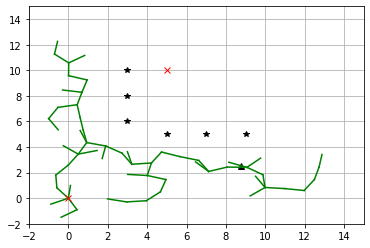

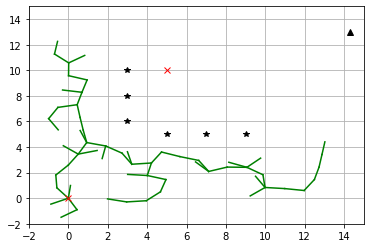

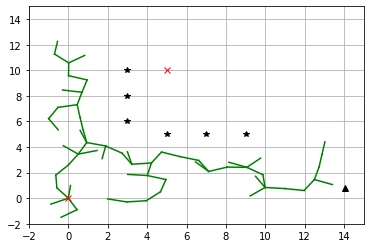

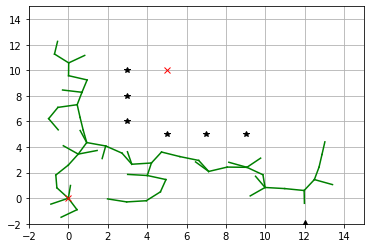

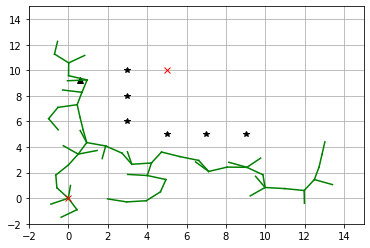

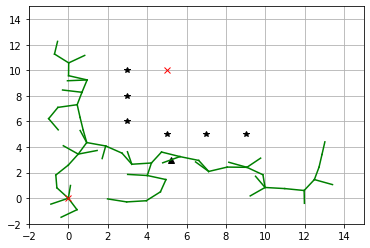

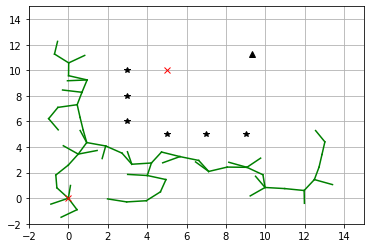

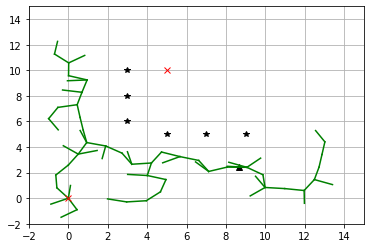

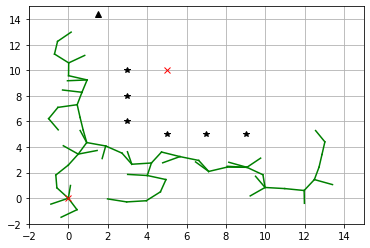

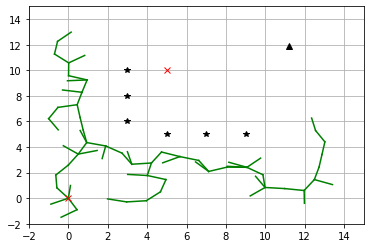

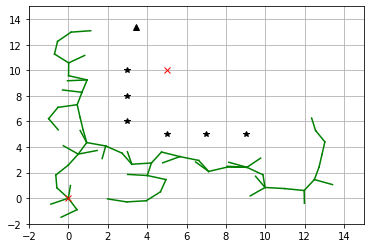

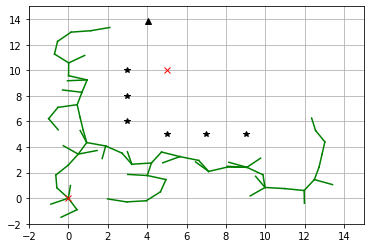

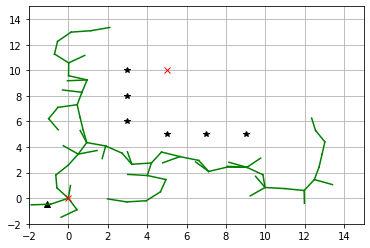

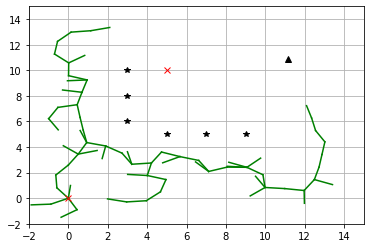

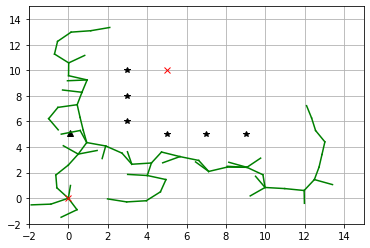

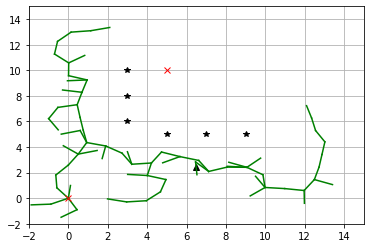

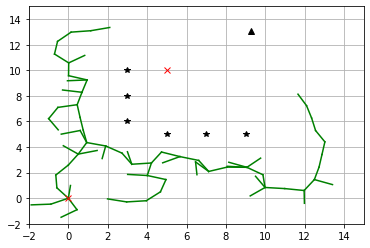

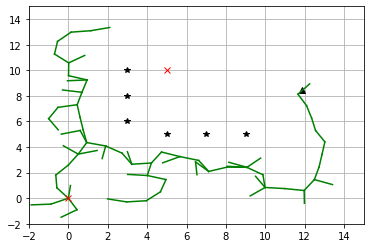

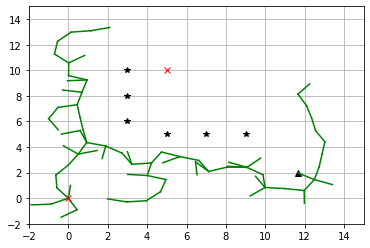

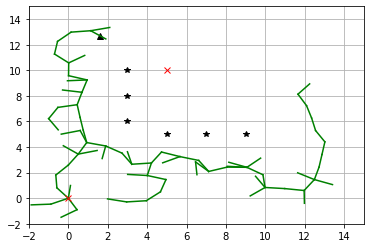

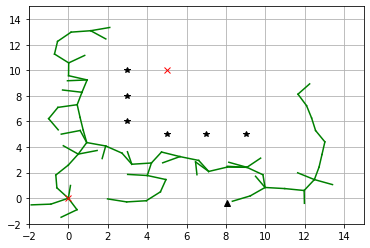

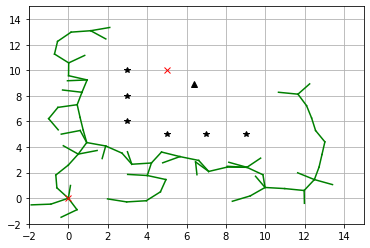

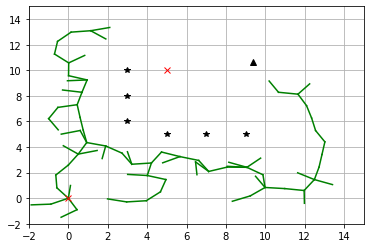

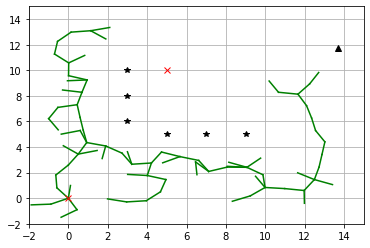

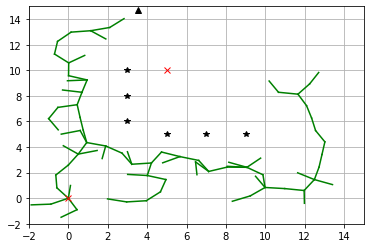

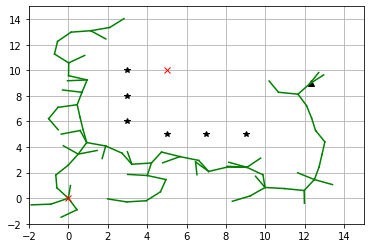

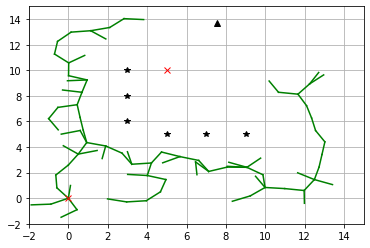

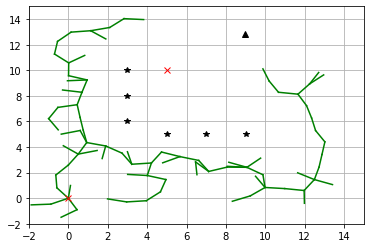

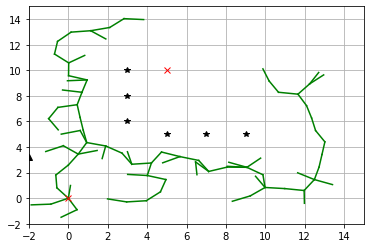

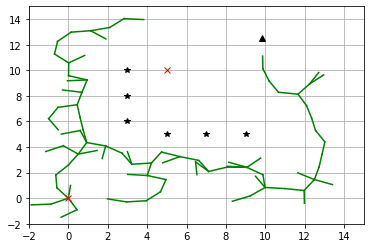

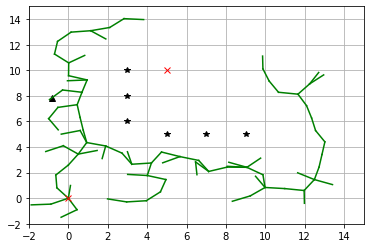

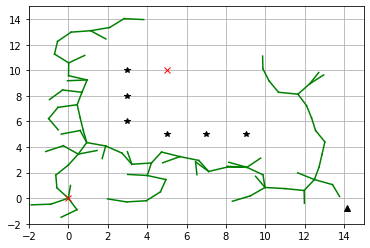

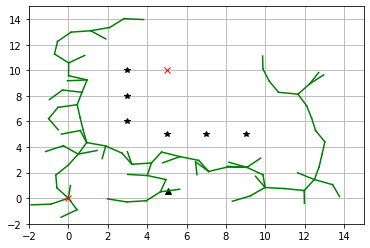

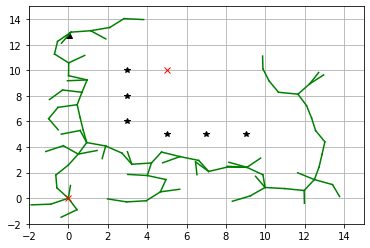

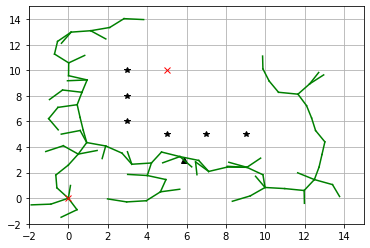

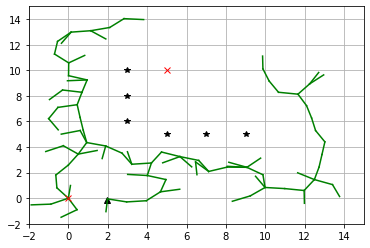

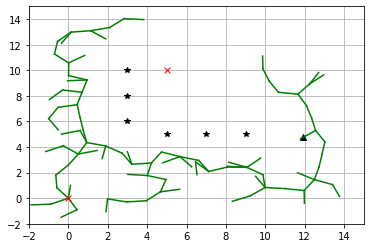

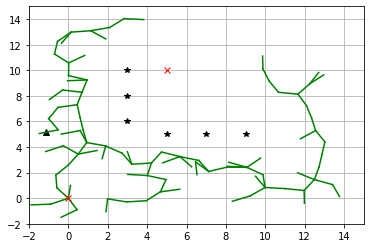

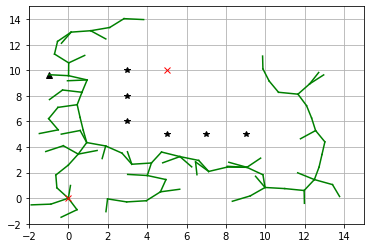

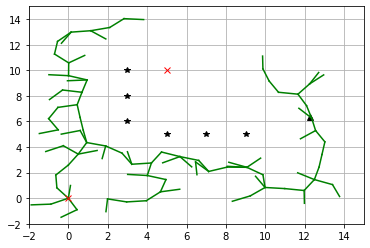

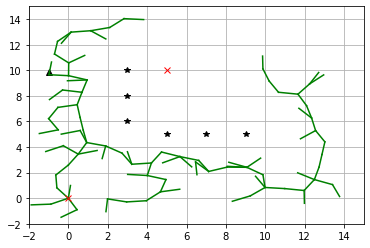

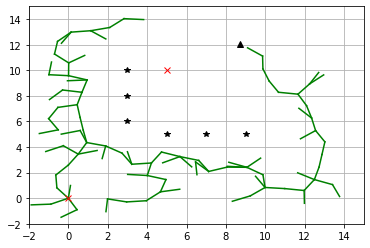

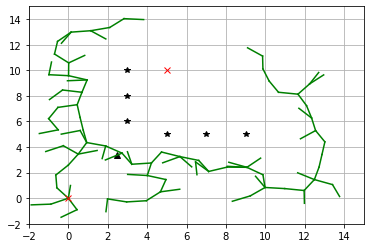

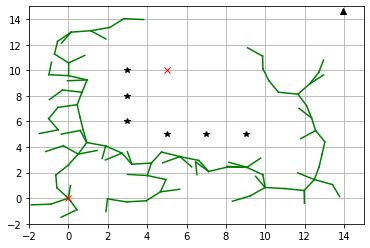

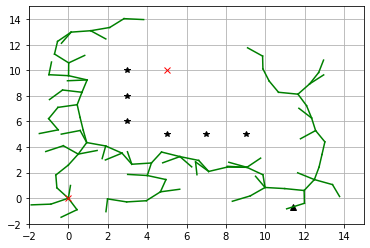

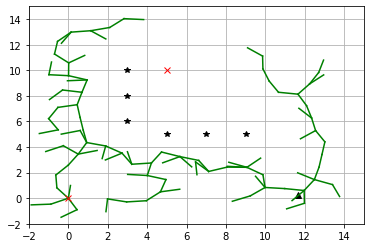

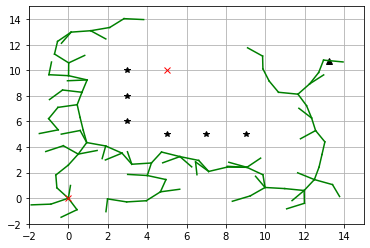

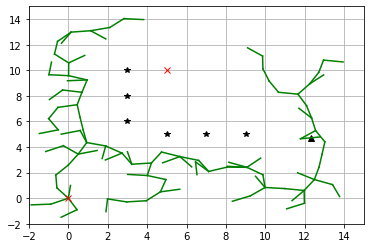

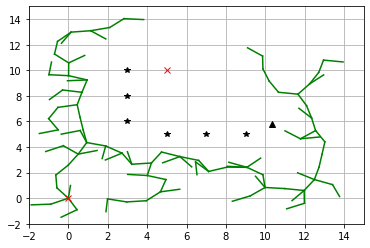

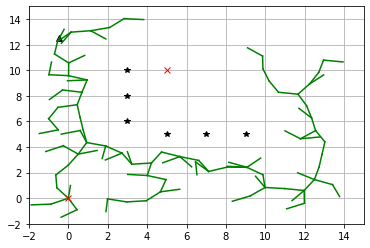

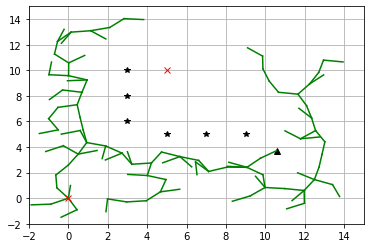

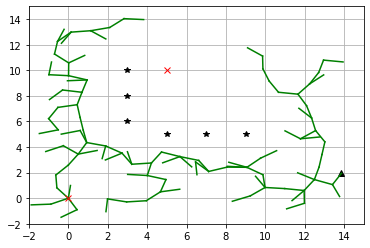

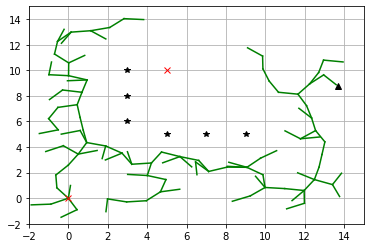

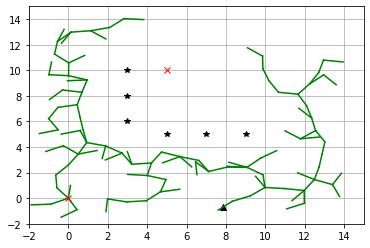

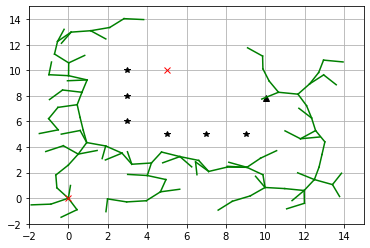

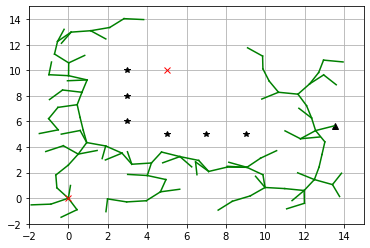

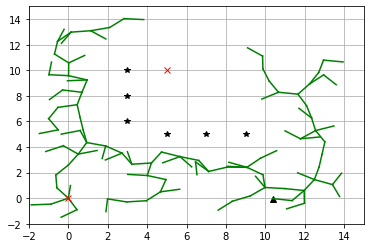

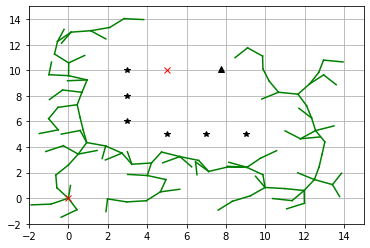

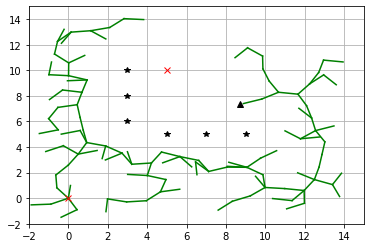

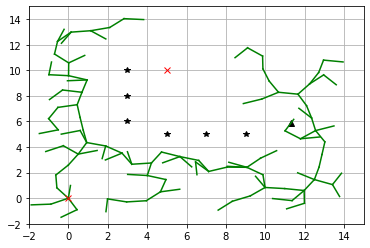

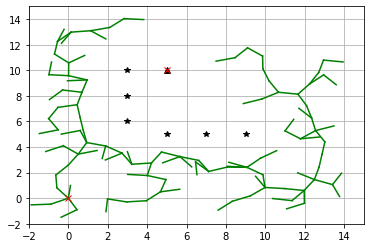

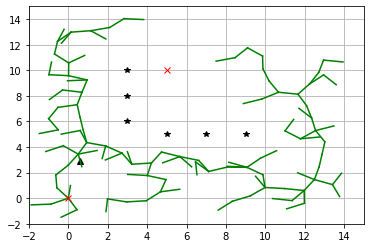

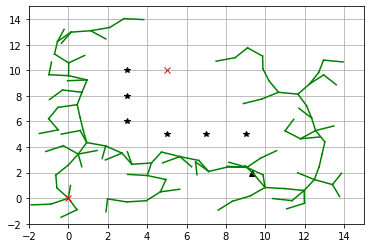

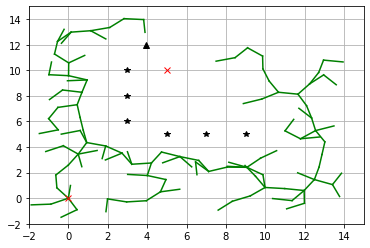

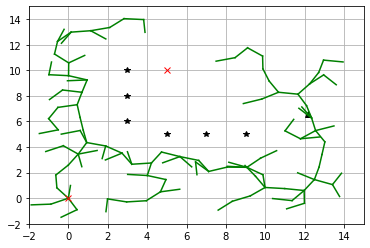

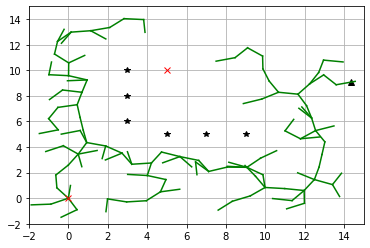

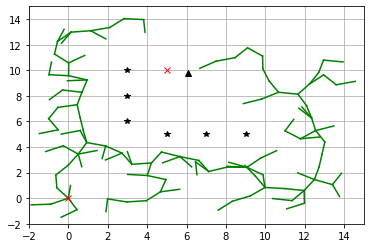

Goal!!


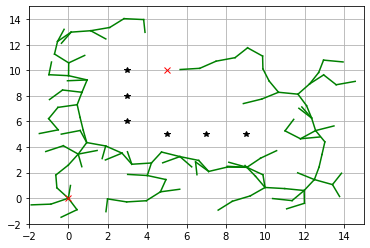

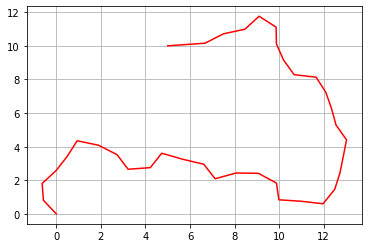

In [13]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
u"""
@brief: Path Planning Sample Code with Randamized Rapidly-Exploring Random Trees (RRT) 

@author: AtsushiSakai

@license: MIT

"""

import random
import math
import copy
import numpy as np

class RRT():
    u"""
    Class for RRT Planning
    """

    def __init__(self, start, goal, obstacleList,randArea,expandDis=1.0,goalSampleRate=5,maxIter=500):
        u"""
        Setting Parameter

        start:Start Position [x,y]
        goal:Goal Position [x,y]
        obstacleList:obstacle Positions [[x,y,size],...]
        randArea:Ramdom Samping Area [min,max]

        """
        self.start=Node(start[0],start[1])
        self.end=Node(goal[0],goal[1])
        self.minrand = randArea[0]
        self.maxrand = randArea[1]
        self.expandDis = expandDis
        self.goalSampleRate = goalSampleRate
        self.maxIter = maxIter

    def Planning(self,animation=True):
        u"""
        Pathplanning 

        animation: flag for animation on or off
        """

        self.nodeList = [self.start]
        while True:
            # Random Sampling
            if random.randint(0, 100) > self.goalSampleRate:
                rnd = [random.uniform(self.minrand, self.maxrand), random.uniform(self.minrand, self.maxrand)]
            else:
                rnd = [self.end.x, self.end.y]

            # Find nearest node
            nind = self.GetNearestListIndex(self.nodeList, rnd)
            # print(nind)

            # expand tree
            nearestNode =self.nodeList[nind]
            theta = math.atan2(rnd[1] - nearestNode.y, rnd[0] - nearestNode.x)

            newNode = copy.deepcopy(nearestNode)
            newNode.x += self.expandDis * math.cos(theta)
            newNode.y += self.expandDis * math.sin(theta)
            newNode.parent = nind

            if not self.__CollisionCheck(newNode, obstacleList):
                continue

            self.nodeList.append(newNode)

            # check goal
            dx = newNode.x - self.end.x
            dy = newNode.y - self.end.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= self.expandDis:
                print("Goal!!")
                break

            if animation:
                self.DrawGraph(rnd)

            
        path=[[self.end.x,self.end.y]]
        lastIndex = len(self.nodeList) - 1
        while self.nodeList[lastIndex].parent is not None:
            node = self.nodeList[lastIndex]
            path.append([node.x,node.y])
            lastIndex = node.parent
        path.append([self.start.x, self.start.y])

        return path

    def DrawGraph(self,rnd=None):
        u"""
        Draw Graph
        """
        import matplotlib.pyplot as plt
        plt.clf()
        if rnd is not None:
            plt.plot(rnd[0], rnd[1], "^k")
        for node in self.nodeList:
            if node.parent is not None:
                plt.plot([node.x, self.nodeList[node.parent].x], [node.y, self.nodeList[node.parent].y], "-g")
        #plt.plot([ox for (ox,oy,size) in obstacleList],[oy for (ox,oy,size) in obstacleList], "*k", ms=size * 20)
        plt.plot([ox for (ox,oy,size) in obstacleList],[oy for (ox,oy,size) in obstacleList], "*k")#<-- plot a black point at the Origin
        """for (ox, oy, size) in obstacleList:
            self.plot_circle(ox, oy, size)"""
        plt.plot(self.start.x, self.start.y, "xr")
        plt.plot(self.end.x, self.end.y, "xr")
        plt.axis([-2, 15, -2, 15])
        plt.grid(True)
        plt.pause(0.01)

    def GetNearestListIndex(self, nodeList, rnd):
        dlist = [(node.x - rnd[0]) ** 2 + (node.y - rnd[1]) ** 2 for node in nodeList]
        minind = dlist.index(min(dlist))
        return minind

    def __CollisionCheck(self, node, obstacleList):

        for (ox, oy, size) in obstacleList:
            dx = ox - node.x
            dy = oy - node.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= size:
                return False  # collision

        return True  # safe

    """def plot_circle(x, y, size, color="-b"):  # pragma: no cover
        deg = list(range(0, 360, 5))
        deg.append(0)
        xl = [x + size * math.cos(np.deg2rad(d)) for d in deg]
        yl = [y + size * math.sin(np.deg2rad(d)) for d in deg]
        plt.plot(xl, yl, color)"""

    
class Node():
    u"""
    RRT Node
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    #====Search Path with RRT====
    obstacleList = [
        (5, 5, 1),
        (3, 6, 2),
        (3, 8, 2),
        (3, 10, 2),
        (7, 5, 2),
        (9, 5, 2)
    ]
    """obstacleList = [
        [5, 5, 1],
        [3, 6, 2],
        [3, 8, 2],
        [3, 10, 2],
        [7, 5, 2],
        [9, 5, 2]
    ] 
    for i in range(len(obstacleList)):
        obstacleList[i][2] = obstacleList[i][2] * 20"""
    
    # [x,y,size]
    #Set Initial parameters
    rrt=RRT(start=[0,0],goal=[5,10],randArea=[-2,15],obstacleList=obstacleList)
    path=rrt.Planning(animation=True)

    # Draw final path
    rrt.DrawGraph()
    plt.plot([x for (x,y) in path], [y for (x,y) in path],'-r')
    plt.grid(True)
    plt.pause(0.01)  # Need for Mac
    plt.show()

In [40]:
 obstacleList = [
        [5, 5, 1],
        [3, 6, 2],
        [3, 8, 2],
        [3, 10, 2],
        [7, 5, 2],
        [9, 5, 2]
    ] 

In [41]:
obstacleList[0][2]

1

In [42]:
obstacleList[0][2] = obstacleList[0][2] * 20
obstacleList[0][2]

20

In [43]:
for i in range(len(obstacleList)):
    obstacleList[i][2] = obstacleList[i][2] * 20

In [44]:
obstacleList

[[5, 5, 400], [3, 6, 40], [3, 8, 40], [3, 10, 40], [7, 5, 40], [9, 5, 40]]

In [12]:
deg = list(range(0, 360, 5))
